In [101]:
import numpy as np
from matplotlib import pyplot as plt
from groupyr import LogisticSGL
from groupyr.logistic import WeightedLogisticSGL
import pandas as pd
from pca import (pca, logistic_pca)
import linearcorex as lc
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.metrics as metrics
from sklearn.multiclass import OneVsRestClassifier



In [102]:
def mark_as_categorical(dataframe: pd.DataFrame, category: str):
    dataframe[category] = dataframe[category].astype('category')

def get_categories(dataframe: pd.DataFrame):
    return [col for col in dataframe.select_dtypes(include="category")]

In [103]:
def create_groups_from_1hot(data_frame: pd.DataFrame):
    expanded = pd.get_dummies(data_frame)
    groups = {col: [] for col in data_frame}
    for idx, col in enumerate(expanded):
        category = col.split("_")[0]
        groups[category].append(idx)

    groups = {k: np.array(v) for k, v in groups.items()}
    return expanded, groups

In [104]:
def expand_data(data):
    mark_as_categorical(data, "MaritalStatus")
    mark_as_categorical(data, "ApplicationMode")
    mark_as_categorical(data, "ApplicationOrder")
    mark_as_categorical(data, "TimeOfDay")
    mark_as_categorical(data, "PreviousQualification")
    mark_as_categorical(data, "Nationality")
    mark_as_categorical(data, "MotherQualification")
    mark_as_categorical(data, "FatherQualification")
    mark_as_categorical(data, "MotherOccupation")
    mark_as_categorical(data, "FatherOccupation")
    mark_as_categorical(data, "Course")

    target = data.get("Target").replace(['Dropout', 'Graduate', 'Enrolled'], [0, 1, 2]).astype(float)

    #Scaling
    for col in data.select_dtypes(include=["float",'int'], exclude="category"):
        data[col] /= data[col].max()

    #Hot 1 and Grouping
    expanded_X, group_idxs = create_groups_from_1hot(data.drop(columns="Target"))

    return expanded_X, group_idxs, target
def stage_data(data, stage):
    # staged data feed
    if stage == 'sem2':
      features = data
    elif stage == 'sem1':
      features = data.drop(columns = ['Curricular units 2nd sem (credited)',
  'Curricular units 2nd sem (enrolled)',
  'Curricular units 2nd sem (evaluations)',
  'Curricular units 2nd sem (approved)',
  'Curricular units 2nd sem (grade)',
  'Curricular units 2nd sem (without evaluations)'])
    elif stage == 'registration':
      features = data.drop(columns = ['Curricular units 1st sem (credited)',
  'Curricular units 1st sem (enrolled)',
  'Curricular units 1st sem (evaluations)',
  'Curricular units 1st sem (approved)',
  'Curricular units 1st sem (grade)',
  'Curricular units 1st sem (without evaluations)',
  'Curricular units 2nd sem (credited)',
  'Curricular units 2nd sem (enrolled)',
  'Curricular units 2nd sem (evaluations)',
  'Curricular units 2nd sem (approved)',
  'Curricular units 2nd sem (grade)',
  'Curricular units 2nd sem (without evaluations)'])

    expanded_X, group_idxs, target = expand_data(features)
    X = expanded_X.to_numpy(np.float64)
    y = target.to_numpy(np.float64)
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

    return X_train,X_test,y_train,y_test, group_idxs

In [105]:
kid_data = pd.read_csv("data.csv", delimiter=";")

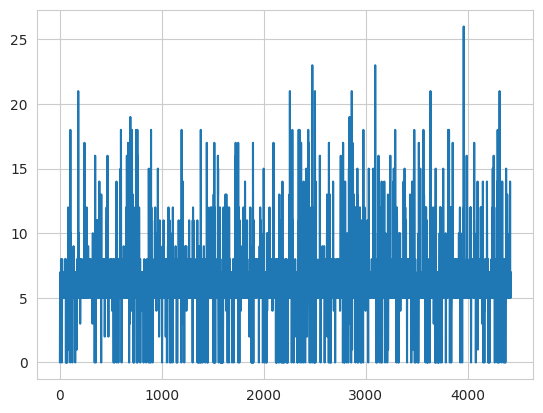

In [106]:
plt.plot(kid_data['Curricular units 1st sem (enrolled)'])

(array([6.04e+02, 3.03e+03, 6.54e+02, 9.80e+01, 2.90e+01, 3.00e+00,
        3.00e+00, 1.00e+00, 0.00e+00, 2.00e+00]),
 array([ 0. ,  5.7, 11.4, 17.1, 22.8, 28.5, 34.2, 39.9, 45.6, 51.3, 57. ]),
 <BarContainer object of 10 artists>)

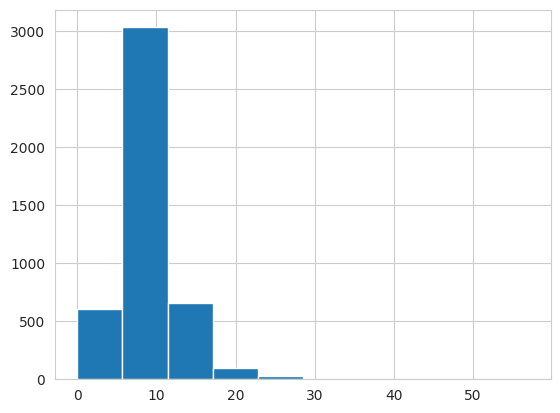

In [107]:
plt.hist(kid_data['Curricular units 1st sem (evaluations)'] + kid_data['Curricular units 1st sem (without evaluations)'])

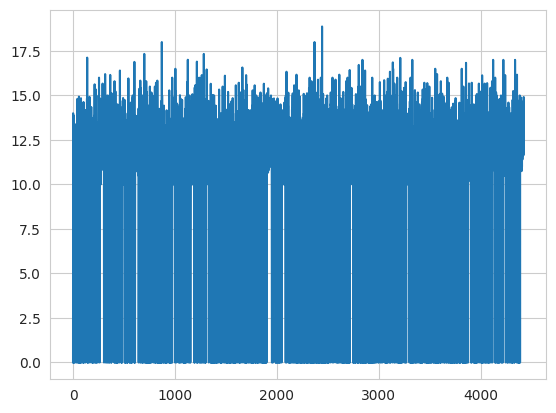

In [108]:
plt.plot(kid_data['Curricular units 1st sem (grade)'])

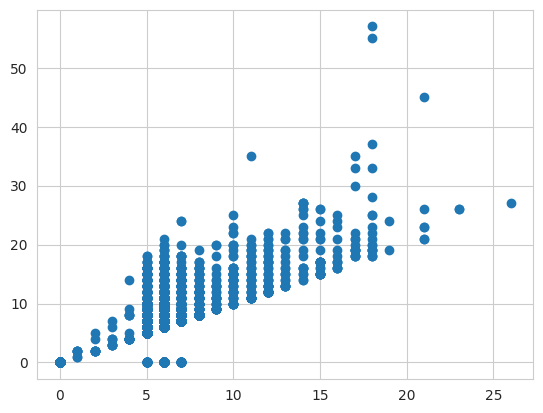

In [109]:
plt.scatter(kid_data['Curricular units 1st sem (enrolled)'], kid_data['Curricular units 1st sem (evaluations)'] + kid_data['Curricular units 1st sem (without evaluations)'])

(array([1008.,  684., 1848.,  675.,   71.,   80.,   29.,   21.,    2.,
           6.]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <BarContainer object of 10 artists>)

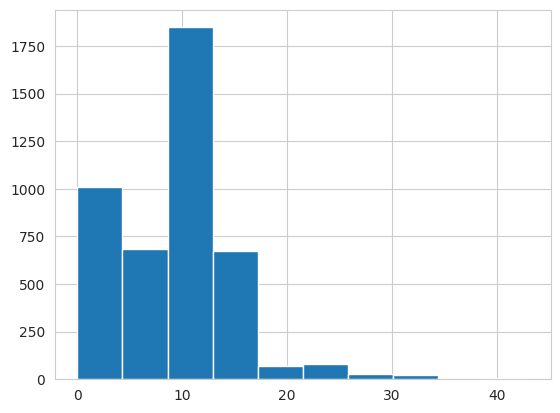

In [110]:
plt.hist(kid_data['Curricular units 1st sem (approved)']+kid_data['Curricular units 2nd sem (approved)'])

In [111]:
mark_as_categorical(kid_data, "MaritalStatus")
mark_as_categorical(kid_data, "ApplicationMode")
mark_as_categorical(kid_data, "ApplicationOrder")
mark_as_categorical(kid_data, "TimeOfDay")
mark_as_categorical(kid_data, "PreviousQualification")
mark_as_categorical(kid_data, "Nationality")
mark_as_categorical(kid_data, "MotherQualification")
mark_as_categorical(kid_data, "FatherQualification")
mark_as_categorical(kid_data, "MotherOccupation")
mark_as_categorical(kid_data, "FatherOccupation")
mark_as_categorical(kid_data, "Course")
target = kid_data.get("Target").replace(['Dropout', 'Graduate', 'Enrolled'], [0, 1, 2]).astype(float),


for col in kid_data.select_dtypes(include=["float", "int"], exclude="category"):
    kid_data[col] /= kid_data[col].max()

expanded_X, group_idxs = create_groups_from_1hot(kid_data.drop(columns="Target"))
expanded_X

,PreviousGrade,AdmissionGrade,Displaced,SpecialNeeds,Debtor,TuitionPaid,Gender,Scholarship,Age,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,MaritalStatus_4,MaritalStatus_5,MaritalStatus_6,ApplicationMode_1,ApplicationMode_2,ApplicationMode_5,ApplicationMode_7,ApplicationMode_10,ApplicationMode_15,ApplicationMode_16,ApplicationMode_17,ApplicationMode_18,ApplicationMode_26,ApplicationMode_27,ApplicationMode_39,ApplicationMode_42,ApplicationMode_43,ApplicationMode_44,ApplicationMode_51,ApplicationMode_53,ApplicationMode_57,ApplicationOrder_0,ApplicationOrder_1,ApplicationOrder_2,ApplicationOrder_3,ApplicationOrder_4,ApplicationOrder_5,ApplicationOrder_6,ApplicationOrder_9,Course_33,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,TimeOfDay_0,TimeOfDay_1,PreviousQualification_1,PreviousQualification_2,PreviousQualification_3,PreviousQualification_4,PreviousQualification_5,PreviousQualification_6,PreviousQualification_9,PreviousQualification_10,PreviousQualification_12,PreviousQualification_14,PreviousQualification_15,PreviousQualification_19,PreviousQualification_38,PreviousQualification_39,PreviousQualification_40,PreviousQualification_42,PreviousQualification_43,Nationality_1,Nationality_2,Nationality_6,Nationality_11,Nationality_13,Nationality_14,Nationality_17,Nationality_21,Nationality_22,Nationality_24,Nationality_25,Nationality_26,Nationality_32,Nationality_41,Nationality_62,Nationality_100,Nationality_101,Nationality_103,Nationality_105,Nationality_108,Nationality_109,MotherQualification_1,MotherQualification_2,MotherQualification_3,MotherQualification_4,MotherQualification_5,MotherQualification_6,MotherQualification_9,MotherQualification_10,MotherQualification_11,MotherQualification_12,MotherQualification_14,MotherQualification_18,MotherQualification_19,MotherQualification_22,MotherQualification_26,MotherQualification_27,MotherQualification_29,MotherQualification_30,MotherQualification_34,MotherQualification_35,MotherQualification_36,MotherQualification_37,MotherQualification_38,MotherQualification_39,MotherQualification_40,MotherQualification_41,MotherQualification_42,MotherQualification_43,MotherQualification_44,FatherQualification_1,FatherQualification_2,FatherQualification_3,FatherQualification_4,FatherQualification_5,FatherQualification_6,FatherQualification_9,FatherQualification_10,FatherQualification_11,FatherQualification_12,FatherQualification_13,FatherQualification_14,FatherQualification_18,FatherQualification_19,FatherQualification_20,FatherQualification_22,FatherQualification_25,FatherQualification_26,FatherQualification_27,FatherQualification_29,FatherQualification_30,FatherQualification_31,FatherQualification_33,FatherQualification_34,FatherQualification_35,FatherQualification_36,FatherQualification_37,FatherQualification_38,FatherQualification_39,FatherQualification_40,FatherQualification_41,FatherQualification_42,FatherQualification_43,FatherQualification_44,MotherOccupation_0,MotherOccupation_1,MotherOccupation_2,MotherOccupation_3,MotherOccupation_4,MotherOccupation_5,MotherOccupation_6,MotherOccupation_7,MotherOccupation_8,MotherOccupation_9,MotherOccupation_10,MotherOccupation_90,MotherOccupation_99,MotherOccupation_122,MotherOccupation_123,MotherOccupation_125,MotherOccupation_131,MotherOccupation_132,MotherOccupation_134,MotherOccupation_141,MotherOccupation_143,

In [112]:
kid_data.get("Target").value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

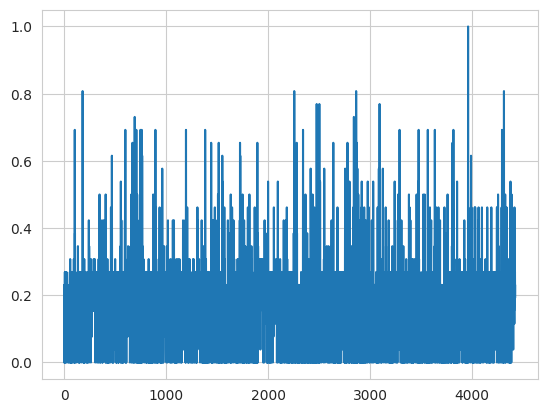

In [113]:
plt.plot(kid_data['Curricular units 1st sem (approved)'])

In [114]:
get_categories(kid_data)

['MaritalStatus',
 'ApplicationMode',
 'ApplicationOrder',
 'Course',
 'TimeOfDay',
 'PreviousQualification',
 'Nationality',
 'MotherQualification',
 'FatherQualification',
 'MotherOccupation',
 'FatherOccupation']

In [119]:
from groupyr import LogisticSGLCV
from sklearn.model_selection import train_test_split

X = expanded_X.to_numpy(np.float64)
y = kid_data['Target'].replace(['Dropout', 'Graduate', 'Enrolled'], [1, 0, 2]).to_numpy(np.float64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test, group_idxs = stage_data(kid_data, "registration")
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape)
print(y_train.shape)

(3539, 243)
(3539,)


Study of OnevRest

In [120]:
def standard_metrics(model, label=""):
    y_pred = model.predict(X_test)
    print("Stats for", label)
    print(metrics.confusion_matrix(y_test, y_pred))
    print("F1 score", metrics.f1_score(y_test, y_pred, average=None))
    print("Training Score", model.score(X_train, y_train))
    print("Testing Score", model.score(X_test, y_test))

In [117]:
model = LogisticRegression(penalty='none', max_iter=10000)
one_v_all_log_r = OneVsRestClassifier(model).fit(X_train, y_train)

model = model.fit(X_train, y_train)

standard_metrics(one_v_all_log_r, "OneVsRest")
standard_metrics(model, "Softmax")

Stats for OneVsRest
[[170  99  15]
 [ 42 383  17]
 [ 29 101  29]]
F1 score [0.64761905 0.74731707 0.26363636]
Training Score 0.6934162192709805
Testing Score 0.6576271186440678
Stats for Softmax
[[170  96  18]
 [ 42 378  22]
 [ 29  98  32]]
F1 score [0.64761905 0.74556213 0.27705628]
Training Score 0.6936987849675049
Testing Score 0.655367231638418


In [121]:
from sklearn.model_selection import GridSearchCV
from groupyr.logistic import WeightedLogisticSGL


group_model = LogisticSGL( groups=list(group_idxs.values()), l1_ratio=0, alpha=0.0,
    verbose=2, suppress_solver_warnings=False, max_iter=10000
)

hyper_params = {
#'estimator__stretching': np.linspace(1, 2, 5),
'estimator__alpha': np.logspace(-3, -1, 15)
}


one_v_all = OneVsRestClassifier(group_model, n_jobs=3)
clf = GridSearchCV(one_v_all, hyper_params, n_jobs=-1, cv=5,scoring = 'f1_macro').fit(X_train, y_train)
#one_v_all = group_model.fit(X_train, y_train)

In [122]:
standard_metrics(clf, "Weighted Logistic")

Stats for Weighted Logistic
[[164 100  20]
 [ 56 368  18]
 [ 35 104  20]]
F1 score [0.60853432 0.72583826 0.1843318 ]
Training Score 0.5781518477744679
Testing Score 0.5062347947849544


In [123]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,177.137586,1.660273,0.005508,0.000777,0.001,{'estimator__alpha': 0.001},0.539125,0.543423,0.502940,0.549726,0.533168,0.533676,0.016293,8
1,177.520780,1.157843,0.004950,0.000136,0.001389,{'estimator__alpha': 0.0013894954943731374},0.541241,0.545596,0.523831,0.548957,0.540288,0.539983,0.008656,2
2,175.958536,1.047924,0.005293,0.000761,0.001931,{'estimator__alpha': 0.0019306977288832496},0.541215,0.543266,0.518776,0.548957,0.540288,0.538500,0.010312,5
3,175.892741,1.366880,0.004864,0.000421,0.002683,{'estimator__alpha': 0.0026826957952797246},0.533576,0.544278,0.519759,0.548034,0.538904,0.536910,0.009872,7
4,176.837694,1.341127,0.004816,0.000180,0.003728,{'estimator__alpha': 0.003727593720314938},0.538792,0.547307,0.521556,0.549585,0.540460,0.539540,0.009860,3
5,172.854084,2.085366,0.004899,0.000066,0.005179,{'estimator__alpha': 0.005179474679231213},0.541819,0.550420,0.518671,0.535446,0.540460,0.537363,0.010516,6
6,174.038030,1.367770,0.005335,0.001227,0.007197,{'estimator__alpha': 0.0071968567300115215},0.537462,0.554343,0.522904,0.539779,0.541921,0.539282,0.010056,4
7,170.021901,2.158729,0.004938,0.000271,0.01,{'estimator__alpha': 0.01},0.545258,0.557406,0.503302,0.553523,0.545857,0.541069,0.019436,1
8,170.323788,2.115674,0.005229,0.000550,0.013895,{'estimator__alpha': 0.013894954943731374},0.502614,0.503707,0.486160,0.529331,0.511604,0.506683,0.014027,9
9,126.964156,46.606602,0.003769,0.001503,0.019307,{'estimator__alpha': 0.019306977288832496},0.499235,0.505492,0.469250,0.497384,0.450234,0.484319,0.021120,10


In [ ]:
plt.plot(one_v_all.estimators_[2].coef_, label="Group Lasso")
one_v_all
#plt.plot(model.coef_.squeeze(), label="Regular")
plt.legend()

In [ ]:
print(expanded_X.columns[abs(group_model.coef_) > 1e-3])
print(expanded_X.columns[np.argmax(abs(group_model.coef_))])

In [ ]:
from groupyr import sgl_path

groups = list(group_idxs.values())
alphas = np.logspace(-4, 0, 200)
path_coefs, path_alphas, path_iters = sgl_path(
    X_train, y_train, l1_ratio=0, groups=groups, alphas=alphas, eps=0.00001, n_alphas=200, max_iter=1000, tol=1e-3
)

group_means = np.array([np.linalg.norm(path_coefs[grp], axis=0) for grp in groups])

zero_idx = np.zeros((len(groups), 1), dtype=int
    #[np.max(np.where(group_means[i] == 0)[0]) for i in range(len(groups))]
)

fig, ax = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

cmap = plt.get_cmap("tab20")

for grp, color, z_idx in zip(groups, cmap.colors, zero_idx):
    _ = ax[0].semilogx(
        path_alphas, np.abs(path_coefs[grp][:-1].transpose()), color=color
    )

    _ = ax[0].axvline(path_alphas[z_idx], ls=":", color=color)
    _ = ax[1].axvline(path_alphas[z_idx], ls=":", color=color)

_ = ax[1].semilogx(path_alphas, group_means.transpose())

_ = ax[1].set_xlabel(r"$\log(\alpha)$", fontsize=16)
_ = ax[0].set_ylabel(r"$\left| \hat{\beta} \right|$", fontsize=16)
_ = ax[1].set_ylabel(
    r"$\left| \left| \hat{\beta}^{(\ell)} \right| \right|_2$", fontsize=16
)
_ = ax[0].set_title(r"SGL regularization path", fontsize=16)
plt.show()

In [ ]:
np.mean(kid_data['Curricular units 1st sem (evaluations)'] >= kid_data['Curricular units 1st sem (enrolled)'])

Try running regular logistic regression in scikit with multiclass class and compare results
Logistic Regression
SVM
A boosted method from their paper
Completely redo the basic scikit learn classifiers
Try a neural network
Jared and Jordan

Stretch - Investigate adding multiclass classification to groupyr
Weighting of classes by size in groupyr
-Alec

Try PCA and LogisticPCA to do feature extraction
TBD - (Alec)
Backward AIC regression
Jared

Plot correlations of variables
Jordan

Report:
Write background/motivation sections

$$\frac{1}{2 n}\sum_{i=1}^n b_i \log(\sigma(\bs{a}_i^T \bs{x}))
         + (1 - b_i) \log(1 - \sigma(\bs{a}_i^T \bs{x}))$$

$$(1 - \rho) * \alpha \displaystyle \sum_{g \in G} || \beta_g ||_2
        + \rho * \alpha || \beta ||_1$$

from pca import logistic_pca
W_reg = pca(X_train)[0]
z_reg_train = X_train.dot(W_reg)
z_reg_test = X_test.dot(W_reg)
W_log = logistic_pca(X_train, num_components=100)
print(W_log)
z_log_train = X_train.dot(W_log)
z_log_test = X_test.dot(W_log)

#pca_model = LogisticRegression().fit(z_reg_train, y_train)
#print(pca_model.score(z_reg_test, y_test))
lpca_model = LogisticRegression().fit(z_log_train, y_train)
print(lpca_model.score(z_log_test, y_test))

In [ ]:
#scores = lc.pick_n_hidden(X_train, verbose=True, gaussianize='outliers')
#print(scores)
out = lc.Corex(n_hidden=8, verbose=False, gaussianize='outliers')  # A Corex model with 8 factors
out.fit(X_train)  # Fit the model on data
z_train = out.transform(X_train)  # Transform data into latent factors
z_test = out.transform(X_test)
print(out.clusters())  # See the clusters
cov = out.get_covariance()  # The covariance matrix

corex_model = LogisticRegression().fit(z_train, y_train)
train_score = corex_model.score(z_train, y_train)
test_score = corex_model.score(z_test, y_test)
y_preds = corex_model.predict(z_test)
print(f"Using CoRex with {out.m} features Train:{train_score} Test:{test_score} F-Score:{metrics.f1_score(y_test, y_pred)}")
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)



In [ ]:
np.mean( [0.61904762 ,0.70462633 ,0.39895013])

In [ ]:
expanded_X.columns[out.clusters() == 0]

In [ ]:
from sklearn.manifold import TSNE

time_start = time.time()

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))